In [21]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
from timeit import default_timer as time
import pandas as pd

6.2) Least squares solver

In [2]:
def least_squares(X, y):
    """
    Solve for the parameters beta such that 
    argmin_beta ||X @ beta - y||_2
    
    @params:
        X   (np.array): [n, d]
        y   (np.array): [n]
    """
    
    # solve the normal equation
    beta = la.solve(X.T @ X, X.T @ y)
    
    return beta

In [16]:
def part_1_4(least_squares):
    
    start = time()

    # part (i) - solve the OLS problem for the given data
    n = 100
    X = np.hstack([np.ones((n, 1)), np.random.random((n, 1))])
    beta = np.array([2., 0.5])
    e = 0.1 * np.random.randn(n)
    y = np.dot(X, beta) + e

    OLS_beta = least_squares(X, y) # It's pretty close!
    print('beta', OLS_beta)
    
    print('Error between beta and beta_hat:', la.norm(beta - OLS_beta))

    # part(ii) - plot y = B_0 + B_1 * x
    domain = np.linspace(0, 1, 100)
    plt.scatter(X[:, 1], y)
    B_0, B_1 = OLS_beta
    plt.plot(domain, B_0 + B_1 * domain)
    plt.title('OLS')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # part (iii)
    X = np.array([[1, -1.7070417],
                  [1, 0.48566752],
                  [1, 1.62940736],
                  [1, -1.03619688],
                  [1, 0.5160501],
                  [1, 0.07292432],
                  [1, 0.19432016],
                  [1, 1.98853255],
                  [1, -1.20937744],
                  [1, 0.24718355]])
    y = np.array([12.97711586,-0.07882501,8.01895309,6.0190389, 
                  1.28260097,-0.15612727,-0.5740016, 9.29385226, 
                  7.86261889, 0.05378747])

    a, b = np.min(X[:, 1]), np.max(X[:, 1])
    domain = np.linspace(a, b, 100)

    # fit a line to the data
    beta_hat = least_squares(X, y)
    line = lambda x, beta_hat: beta_hat[0] + beta_hat[1] * x
    plt.scatter(X[:, 1], y)
    plt.plot(domain, line(domain, beta_hat))

    # fit a quadratic curve to the data
    X = np.hstack([X, (X[:, 1]**2).reshape((len(X), -1))])
    beta_hat = least_squares(X, y)
    quad = lambda x, beta_hat: beta_hat[0] + beta_hat[1] * x + beta_hat[2] * x**2
    plt.plot(domain, quad(domain, beta_hat))
    plt.show()

    # part (iv)
    n = 10**4
    d = 3
    beta = np.array([1, -2, 3, -4])
    X = np.hstack([np.ones((n, 1)), np.random.random((n, d))])
    e = 0.5 * np.random.randn(n)
    y = np.dot(X, beta) + e

    OLS_beta = least_squares(X, y) # It's pretty close!
    print('beta', OLS_beta)
    
    print('Error between beta and beta_hat:', la.norm(beta - OLS_beta))
    
    print('Total time:', time() - start)
    
    

beta [2.02146871 0.4903985 ]
Error between beta and beta_hat: 0.02351795617715892


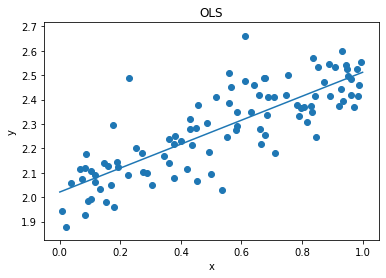

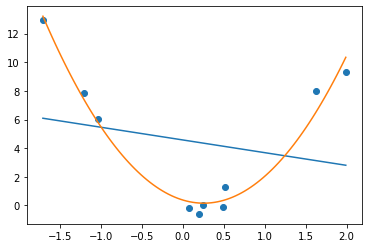

beta [ 0.98171278 -1.99663316  3.046996   -4.0103314 ]
Error between beta and beta_hat: 0.05158604349381359
Total time: 0.3192152999690734


In [17]:
part_1_4(least_squares)

6.4) Repeat problem (6.2) with a least squares solver powered by the QR decomposition.

In [44]:
def least_squares_QR(X, y):
    """
    Solve for the parameters beta such that 
    argmin_beta ||X @ beta - y||_2
    
    Do this using the QR decomposition to solve: X @ beta = y
    
    So if X = Q @ R, then then the above system is equivalent to solving:
        R @ beta = Q.T @ y
    
    @params:
        X   (np.array): [n, d]
        y   (np.array): [n]
    """
    
    # compute Q-R decomposition
    Q, R = np.linalg.qr(X)
    
    # solve the system taking advantage of the fact that R is upper triangular
    beta = la.solve_triangular(R, Q.T @ y)
    
    return beta

beta [1.98771208 0.56065639]
Error between beta and beta_hat: 0.06188853149141617


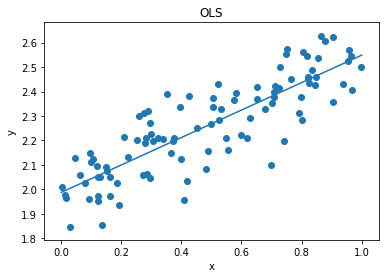

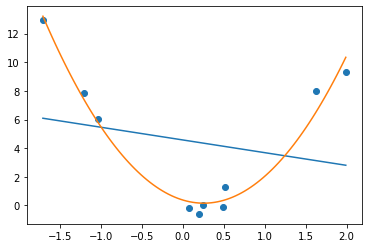

beta [ 0.98639281 -1.99109417  3.01259042 -3.98977129]
Error between beta and beta_hat: 0.022969858359774137
Total time: 0.32845889998134226


In [19]:
part_1_4(least_squares_QR)

the QR decomposition is able to run faster and obtain a more accurate answer

6.5)

In [36]:
df = pd.read_csv('DatasaurusDozen.tsv', sep='\t', header=0)

# sample variance: note, these are almost all the same
df.groupby('dataset').std()**2

x           y
dataset                           
away        281.227029  725.749775
bullseye    281.207393  725.533372
circle      280.898024  725.226844
dino        281.069988  725.515961
dots        281.156953  725.235215
h_lines     281.095333  725.756931
high_lines  281.122364  725.763490
slant_down  281.124206  725.553749
slant_up    281.194420  725.688605
star        281.197993  725.239695
v_lines     281.231512  725.638809
wide_lines  281.232887  725.650560
x_shape     281.231481  725.224991

In [37]:
# sample mean: note, these are all almost the same
df.groupby('dataset').mean()

x          y
dataset                         
away        54.266100  47.834721
bullseye    54.268730  47.830823
circle      54.267320  47.837717
dino        54.263273  47.832253
dots        54.260303  47.839829
h_lines     54.261442  47.830252
high_lines  54.268805  47.835450
slant_down  54.267849  47.835896
slant_up    54.265882  47.831496
star        54.267341  47.839545
v_lines     54.269927  47.836988
wide_lines  54.266916  47.831602
x_shape     54.260150  47.839717

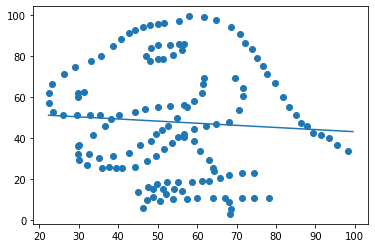

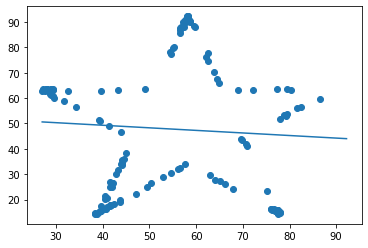

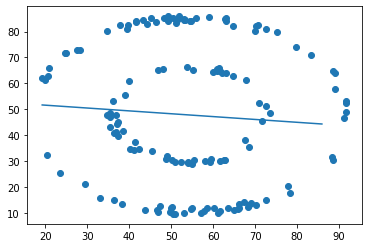

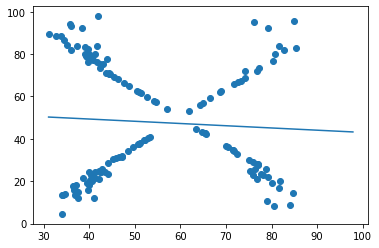

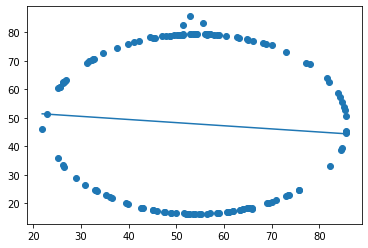

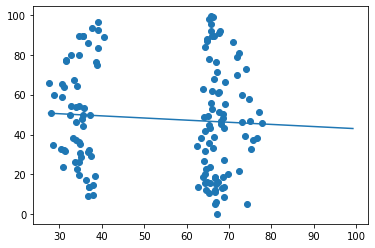

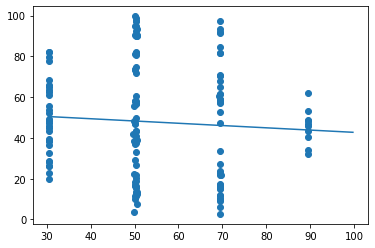

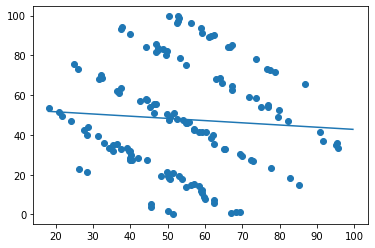

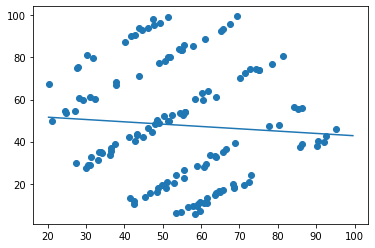

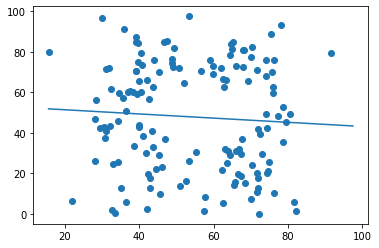

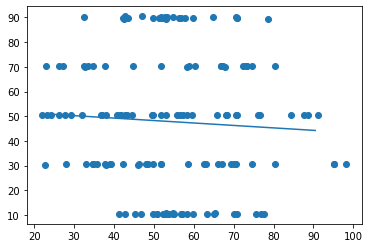

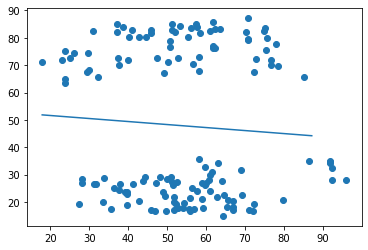

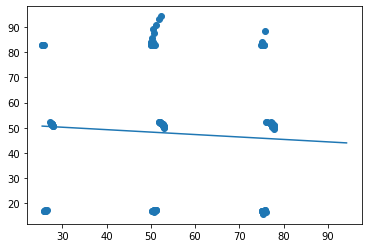

In [48]:
# all of these datasets have the same line of best fit!
datasets = set(df.dataset)
for dataset in datasets:
    
    # get the specific data
    data = df[df.dataset == dataset]
    n = len(data)
    X, y = data.x, data.y

    # pad X with ones to solve the regression
    X = np.hstack([np.ones((n, 1)), X.values.reshape((n, 1))])
    
    # solve the OLS problem
    beta_hat = least_squares_QR(X, y)
    
    # plot the data
    plt.scatter(X[:, 1], y)
    
    # plot the line of best fit
    line = lambda x, beta_hat: beta_hat[0] + beta_hat[1] * x
    a, b = data.x.min(), data.y.max()
    domain = np.linspace(a, b, 100)
    plt.plot(domain, line(domain, beta_hat))
    plt.show()

In [104]:
def least_squares_SVD(X, y):
    """
    Solve for the parameters beta such that 
    argmin_beta ||X @ beta - y||_2
    
    Do this using the SVD decomposition to solve: X @ beta = y
    
    So if X = U @ S @ V.T, then then the above system is equivalent to solving:
        beta_hat = V @ inv(S) @ U.T @ y
    
    @params:
        X   (np.array): [n, d]
        y   (np.array): [n]
    """
    
    # dimension of feature space
    d = X.shape[1]
    
    # compute the SVD of X
    U, S, Vh = np.linalg.svd(X)
    S = np.diag(1 / S[:d])
    
    sigma_pinv = np.zeros(X.shape).T
    sigma_pinv[:d, :d] = S
    
    beta = Vh.T @ (sigma_pinv @ (U.T @ y))
    
    return beta

beta [1.98574372 0.54587545]
Error between beta and beta_hat: 0.04803954513074914


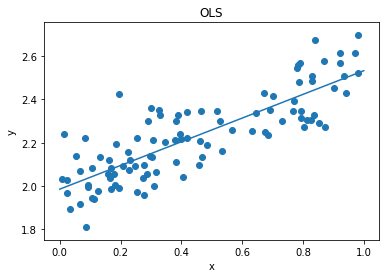

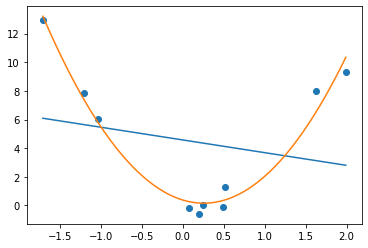

beta [ 1.02147966 -2.01094028  2.99139805 -4.01914829]
Error between beta and beta_hat: 0.03196429525299882
Total time: 43.75959709996823


In [105]:
part_1_4(least_squares_SVD)

In [111]:
# part (ii)
n = 10**3
d = 6
r = 3

Z = np.random.random((n, r))
X = np.hstack([Z, Z])
beta = np.array([1, -2, 3, -4, 5, -6], dtype=np.float32)
e = np.random.randn(n)
y = (X @ beta) + e

beta_hat = least_squares_SVD(X, y)
y_hat = X @ beta_hat

# compute residuals
y - y_hat

array([ 4.18615149e-01, -9.31314305e-01,  1.28589875e-01, -5.86326588e-01,
        9.97633251e-01,  5.44336215e-01, -1.30133613e+00,  1.55232551e+00,
        3.47322178e-01,  1.01648564e+00, -5.24228887e-01, -1.86649287e+00,
        1.64348841e+00,  7.14597472e-01,  1.74622738e-01, -1.68325341e+00,
       -1.13320355e+00,  1.16114516e+00,  3.43602167e-01, -3.75091221e-01,
        1.90784053e+00, -1.46913791e+00, -9.75406146e-01,  2.27386504e-01,
        2.93924346e-01, -2.30319945e-01,  4.01290197e-01, -1.59099715e-01,
        1.46254429e+00,  3.54022699e-01,  2.60244522e-01, -7.45655806e-02,
        2.22284732e+00,  5.08428552e-01,  2.67499377e+00, -2.04677974e+00,
       -6.27478228e-01, -3.53378454e-03, -2.90467935e-01,  1.33997302e+00,
        6.19067970e-02,  1.58223753e-01, -1.14781721e-01, -7.41588650e-01,
       -5.91051518e-01, -9.23682987e-01, -1.29378098e+00, -8.70286789e-01,
       -2.75135597e+00, -9.45277074e-01, -1.11684668e+00,  4.12748656e-01,
        2.33869885e+00,  

In [109]:
X.shape

(1000, 6)